<a href="https://colab.research.google.com/github/Sukrut11/Oil-Accidents/blob/main/Oil_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [6]:
dataset= "https://www.kaggle.com/usdot/pipeline-accidents?select=database.csv"

In [7]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sukrutmayekar
Your Kaggle Key: ··········


100%|██████████| 203k/203k [00:00<00:00, 35.8MB/s]

In [8]:
data_dir= "./pipeline-accidents"

In [9]:
df= pd.read_csv("/content/pipeline-accidents/database.csv")
df2 = df.copy()
df2['All Costs'] = df2['All Costs']/1000000.0
df2['Property Damage Costs'] = df2['Property Damage Costs']/1000000.0
df2['Lost Commodity Costs'] = df2['Lost Commodity Costs']/1000000.0
df2['Public/Private Property Damage Costs'] = df2['Public/Private Property Damage Costs']/1000000.0
df2['Emergency Response Costs'] = df2['Emergency Response Costs']/1000000.0
df2['Environmental Remediation Costs'] = df2['Environmental Remediation Costs']/1000000.0
df2['Other Costs'] = df2['Other Costs']/1000000.0

In [10]:
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [11]:
df.isnull().sum()

Report Number                              0
Supplemental Number                        0
Accident Year                              0
Accident Date/Time                         0
Operator ID                                0
Operator Name                              0
Pipeline/Facility Name                   121
Pipeline Location                          0
Pipeline Type                             18
Liquid Type                                0
Liquid Subtype                          1446
Liquid Name                             2573
Accident City                            315
Accident County                           75
Accident State                            12
Accident Latitude                          0
Accident Longitude                         0
Cause Category                             0
Cause Subcategory                          0
Unintentional Release (Barrels)            0
Intentional Release (Barrels)           1586
Liquid Recovery (Barrels)                  0
Net Loss (

In [12]:
df.shape

(2795, 48)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

In [14]:
df.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,2338.000000,12.000000,12.0000,12.0,12.0,12.000000,12.000000,8.0,8.000000,8.0,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,0.964072,0.250000,1.0000,0.0,0.0,0.416667,1.666667,0.0,0.500000,0.0,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,18.151398,0.452267,1.3484,0.0,0.0,0.900337,1.073087,0.0,0.755929,0.0,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,0.000000,0.000000,0.5000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,0.000000,0.250000,1.2500,0.0,0.0,0.250000,2.250000,0.0,1.000000,0.0,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,700.000000,1.000000,4.0000,0.0,0.0,3.000000,4.000000,0.0,2.000000,0.0,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


In [15]:
x= df.copy()

In [16]:
x.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [17]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

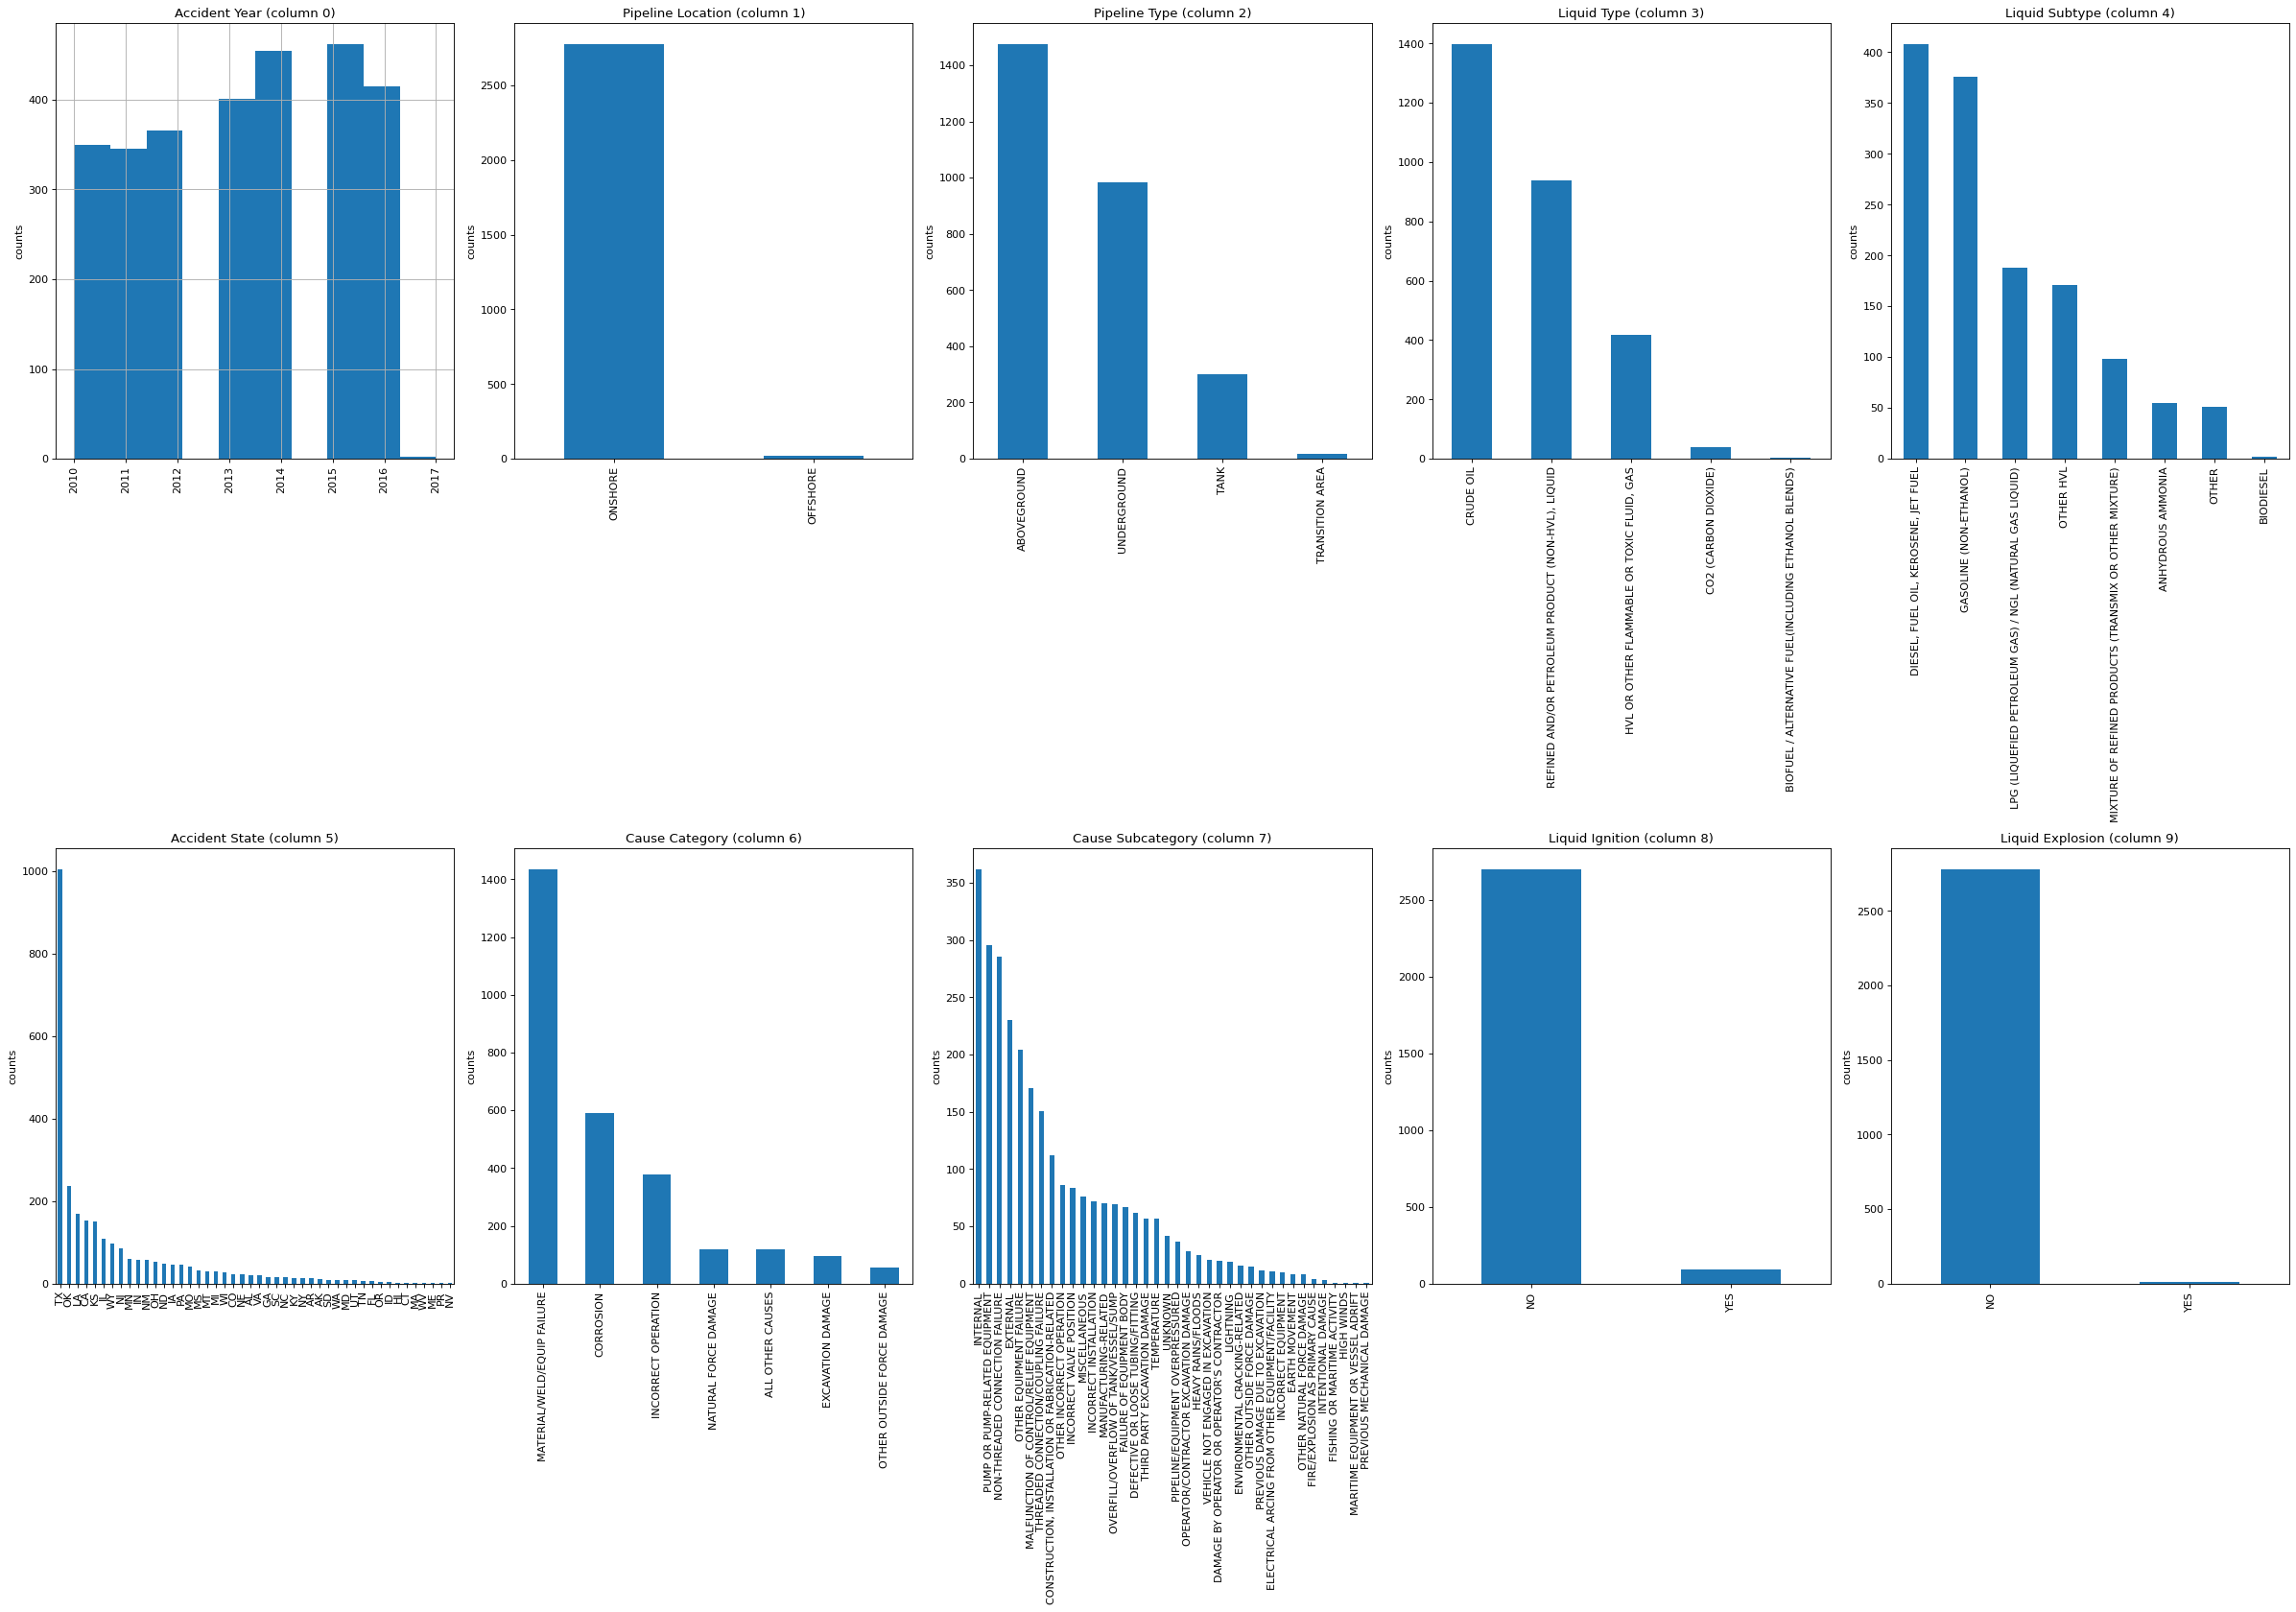

In [18]:
plotPerColumnDistribution(df, 10, 5)

In [19]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

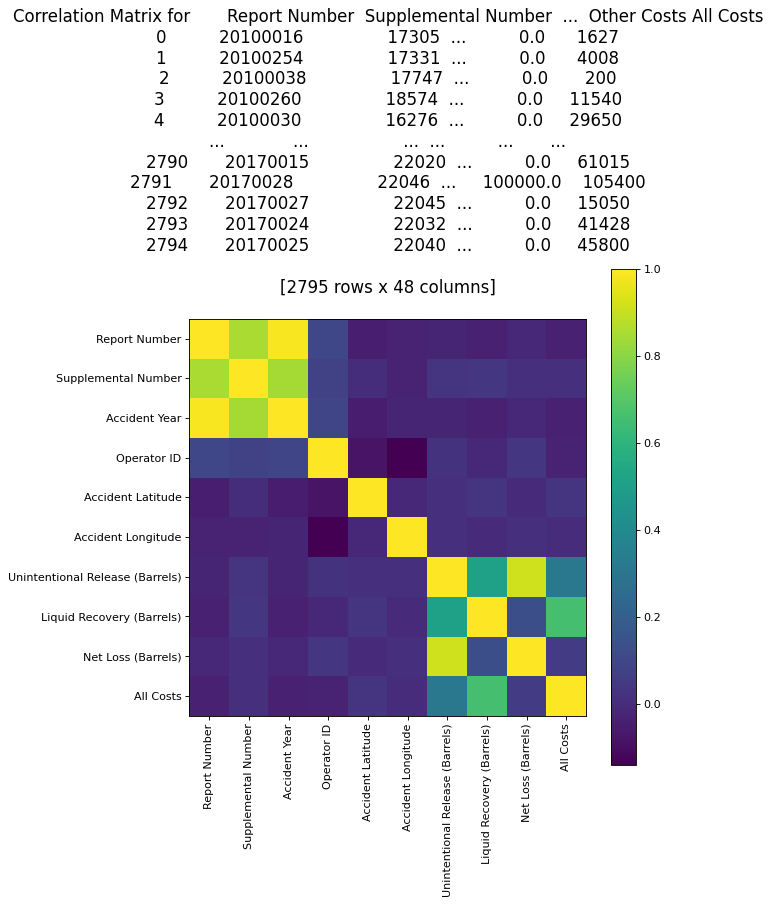

In [20]:
plotCorrelationMatrix(df, 8)

In [21]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

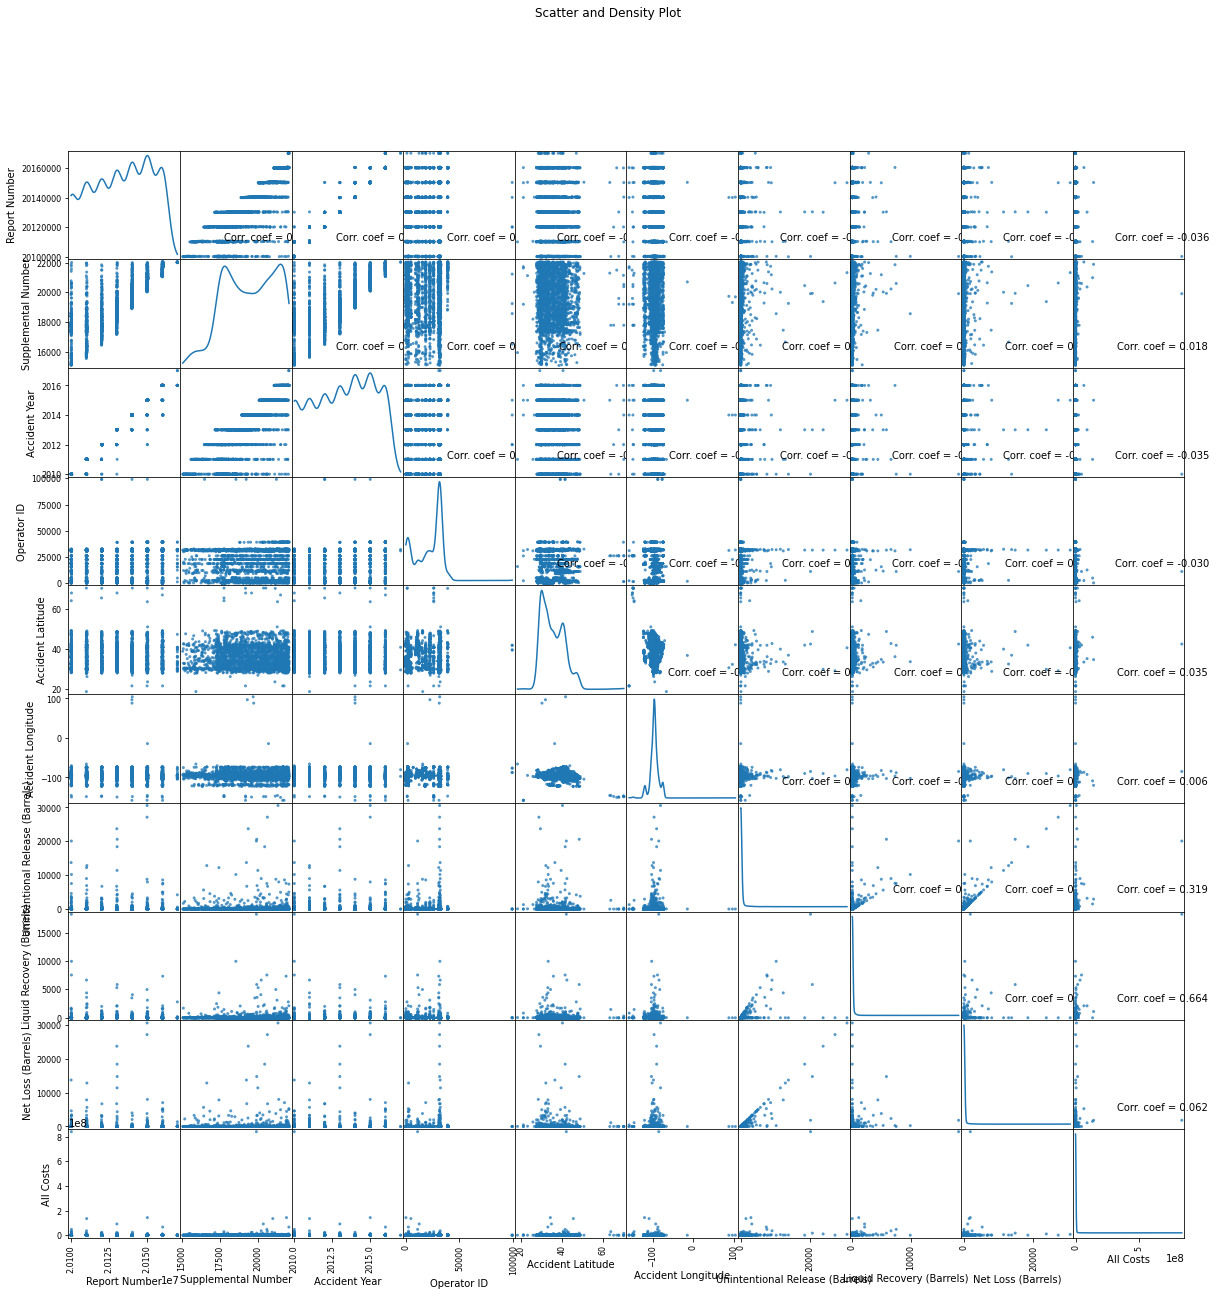

In [22]:
plotScatterMatrix(df, 20, 10)

In [23]:
# Some calculations to plot distributions by year

headers = ['Accident Year','All Costs','Property Damage Costs',
           'Lost Commodity Costs','Public/Private Property Damage Costs',
           'Emergency Response Costs','Environmental Remediation Costs', 'Other Costs']
df_forPlots = df2[headers]
df_forPlots = df_forPlots[df_forPlots['Accident Year'] != 2017]
by_year = df_forPlots.groupby('Accident Year')

xPt = by_year.sum()['All Costs'].index.values
yAll_sum = by_year.sum()['All Costs'].values
yPro_sum = by_year.sum()['Property Damage Costs'].values
yCom_sum = by_year.sum()['Lost Commodity Costs'].values
yPri_sum = by_year.sum()['Public/Private Property Damage Costs'].values
yEme_sum = by_year.sum()['Emergency Response Costs'].values
yEnv_sum = by_year.sum()['Environmental Remediation Costs'].values

fracProp = by_year.mean()['Property Damage Costs'].values / by_year.mean()['All Costs'].values
fracComm = by_year.mean()['Lost Commodity Costs'].values / by_year.mean()['All Costs'].values
fracPriP = by_year.mean()['Public/Private Property Damage Costs'].values / by_year.mean()['All Costs'].values
fracEmer = by_year.mean()['Emergency Response Costs'].values / by_year.mean()['All Costs'].values
fracEnvi = by_year.mean()['Environmental Remediation Costs'].values / by_year.mean()['All Costs'].values

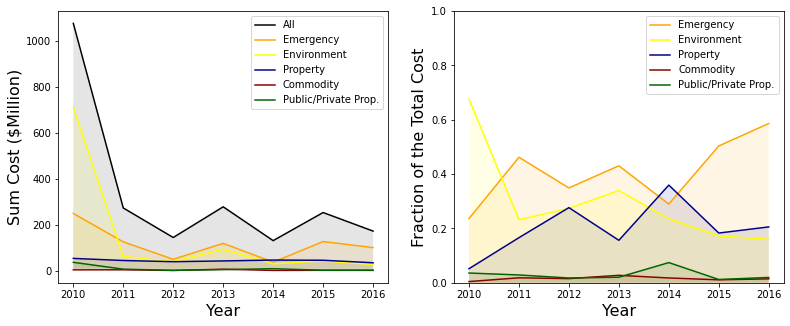

In [24]:
# Year-by-year plot

f, a = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

a[0].plot(xPt, yAll_sum, label="All", color='black')
a[0].plot(xPt, yEme_sum,label="Emergency", color='orange')
a[0].plot(xPt, yEnv_sum,label="Environment", color='yellow')
a[0].plot(xPt, yPro_sum,label="Property", color='darkblue')
a[0].plot(xPt, yCom_sum,label="Commodity", color='darkred')
a[0].plot(xPt, yPri_sum,label="Public/Private Prop.", color='darkgreen')
a[0].fill_between(xPt, yAll_sum, 10E0, facecolor='black', alpha=0.1)
a[0].fill_between(xPt, yPro_sum, 10E0, facecolor='darkblue', alpha=0.1)
a[0].fill_between(xPt, yCom_sum, 10E0, facecolor='darkred', alpha=0.1)
a[0].fill_between(xPt, yPri_sum, 10E0, facecolor='darkgreen', alpha=0.1)
a[0].fill_between(xPt, yEme_sum, 10E0, facecolor='orange', alpha=0.1)
a[0].fill_between(xPt, yEnv_sum, 10E0, facecolor='yellow', alpha=0.1)
a[0].get_xaxis().get_major_formatter().set_useOffset(False)
a[0].set_xlabel('Year', fontsize=16)
a[0].set_ylabel('Sum Cost ($Million)', fontsize=16)
a[0].legend()


a[1].plot(xPt, fracEmer,label="Emergency", color='orange')
a[1].plot(xPt, fracEnvi,label="Environment", color='yellow')
a[1].plot(xPt, fracProp,label="Property", color='darkblue')
a[1].plot(xPt, fracComm,label="Commodity", color='darkred')
a[1].plot(xPt, fracPriP,label="Public/Private Prop.", color='darkgreen')
a[1].fill_between(xPt, fracProp, 0, facecolor='darkblue', alpha=0.1)
a[1].fill_between(xPt, fracComm, 0, facecolor='darkred', alpha=0.1)
a[1].fill_between(xPt, fracPriP, 0, facecolor='darkgreen', alpha=0.1)
a[1].fill_between(xPt, fracEmer, 0, facecolor='orange', alpha=0.1)
a[1].fill_between(xPt, fracEnvi, 0, facecolor='yellow', alpha=0.1)
a[1].get_xaxis().get_major_formatter().set_useOffset(False)
a[1].set_xlabel('Year', fontsize=16)
a[1].set_ylabel('Fraction of the Total Cost', fontsize=16)
a[1].set_ylim([0,1])
tmp = a[1].legend()

In [25]:
df3 = df2.copy()
df3['Month'] = df3['Accident Date/Time'].apply(lambda x: (str(x)[0:2]))
df3['Month'] = df3['Month'].apply(lambda x: int(''.join(c for c in x if c.isdigit())))
df3['Rel Month'] = (df3['Accident Year']-2010)*12. + df3['Month']

headers = headers = ['Accident Year','All Costs','Property Damage Costs',
           'Lost Commodity Costs','Public/Private Property Damage Costs',
           'Emergency Response Costs','Environmental Remediation Costs', 
            'Other Costs', 'Rel Month']
by_month = df3[headers].groupby(['Rel Month'])


xPt = by_month.sum()['All Costs'].index.values
yAll_sum = by_month.sum()['All Costs'].values
yPro_sum = by_month.sum()['Property Damage Costs'].values
yCom_sum = by_month.sum()['Lost Commodity Costs'].values
yPri_sum = by_month.sum()['Public/Private Property Damage Costs'].values
yEme_sum = by_month.sum()['Emergency Response Costs'].values
yEnv_sum = by_month.sum()['Environmental Remediation Costs'].values

fracProp = by_month.mean()['Property Damage Costs'].values / by_month.mean()['All Costs'].values
fracComm = by_month.mean()['Lost Commodity Costs'].values / by_month.mean()['All Costs'].values
fracPriP = by_month.mean()['Public/Private Property Damage Costs'].values / by_month.mean()['All Costs'].values
fracEmer = by_month.mean()['Emergency Response Costs'].values / by_month.mean()['All Costs'].values
fracEnvi = by_month.mean()['Environmental Remediation Costs'].values / by_month.mean()['All Costs'].values

Text(73, 100, '$66 Million Cost\nColonial Pipeline\nHelena, AL')

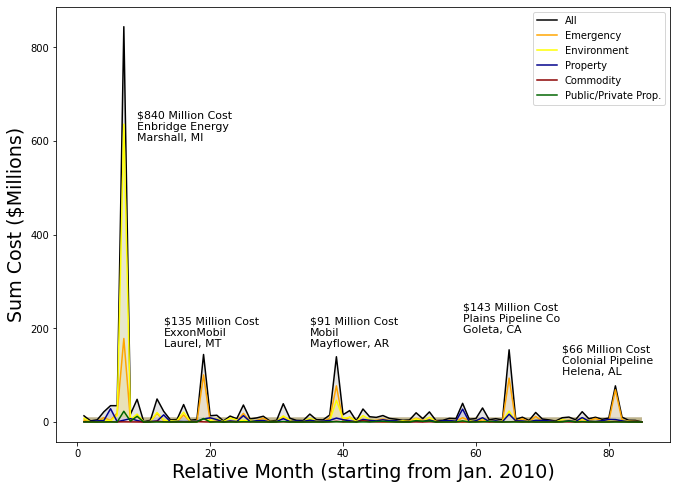

In [26]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

plt.plot(xPt, yAll_sum, label="All", color='black')
plt.plot(xPt, yEme_sum,label="Emergency", color='orange')
plt.plot(xPt, yEnv_sum,label="Environment", color='yellow')
plt.plot(xPt, yPro_sum,label="Property", color='darkblue')
plt.plot(xPt, yCom_sum,label="Commodity", color='darkred')
plt.plot(xPt, yPri_sum,label="Public/Private Prop.", color='darkgreen')
plt.fill_between(xPt, yAll_sum, 10E0, facecolor='black', alpha=0.1)
plt.fill_between(xPt, yPro_sum, 10E0, facecolor='darkblue', alpha=0.1)
plt.fill_between(xPt, yCom_sum, 10E0, facecolor='darkred', alpha=0.1)
plt.fill_between(xPt, yPri_sum, 10E0, facecolor='darkgreen', alpha=0.1)
plt.fill_between(xPt, yEme_sum, 10E0, facecolor='orange', alpha=0.1)
plt.fill_between(xPt, yEnv_sum, 10E0, facecolor='yellow', alpha=0.1)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xlabel('Relative Month (starting from Jan. 2010)', fontsize=19)
plt.ylabel('Sum Cost ($Millions)', fontsize=19)
tmp = plt.legend()
ax.text(9,600, "$840 Million Cost\nEnbridge Energy\nMarshall, MI",fontsize=11)
ax.text(13,160, "$135 Million Cost\nExxonMobil\nLaurel, MT",fontsize=11)
ax.text(35,160, "$91 Million Cost\nMobil\nMayflower, AR",fontsize=11)
ax.text(58,190, "$143 Million Cost\nPlains Pipeline Co\nGoleta, CA",fontsize=11)
ax.text(73,100, "$66 Million Cost\nColonial Pipeline\nHelena, AL",fontsize=11)

In [27]:
df_byCost = df.sort_values(by=['All Costs'], ascending=False)
info = ['Accident Year','Operator Name','Accident City', 'Accident State', 'Cause Category'
       ,'Cause Subcategory','All Costs']
df_byCost[info].head()

,Accident Year,Operator Name,Accident City,Accident State,Cause Category,Cause Subcategory,All Costs
194,2010,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",MARSHALL,MI,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,840526118
2103,2015,"PLAINS PIPELINE, L.P.",GOLETA,CA,CORROSION,EXTERNAL,142931884
523,2011,EXXONMOBIL PIPELINE CO,LAUREL,MT,NATURAL FORCE DAMAGE,HEAVY RAINS/FLOODS,135000000
1173,2013,MOBIL PIPE LINE COMPANY,MAYFLOWER,AR,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,91300000
2675,2016,COLONIAL PIPELINE CO,HELENA,AL,ALL OTHER CAUSES,UNKNOWN,66234072


In [33]:
from plotly.offline import iplot

colors = ["black","black","darkblue","darkblue","darkgreen","darkgreen","darkred","darkred","orange"]
limits = [(0,100),(100,200),(200,300),(300,500),(500,1000),(1000,2000),(2000,5000),(5000,10000),(10000,36000)]
scale = 20
spills = []


for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[((df['Net Loss (Barrels)']>lim[0]) & (df['Net Loss (Barrels)']<lim[1]))]
    spill = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['Accident Longitude'],
        lat = df_sub['Accident Latitude'],
        opacity=0.7,
        marker = dict(
            size = df_sub['Net Loss (Barrels)']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'           
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    spills.append(spill)

layout = dict(
        title = 'Net Barrel Loss of Individual Oil Spills: Jan/2010 - Jan/2017<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'silver',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)",
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'
        ),
    )

fig = dict( data= spills, layout= layout )
iplot(fig)

This is interesting for several reasons.

1. You can see the individual pipelines snake across the country, particularly if you toggle the map to only show the 0-100 data.

2. There are relatively sizable spills all over the country. I am an avid news junkie, I find it kind of surprising that I haven't heard of many of these spills. Spills are ubiquitious!

3. The costliest spills we saw earlier don't seem to be the largest spills (by net barrel). There must be some other factor at play that causes big cleanup costs.

4. The states with the 5 highest costing spills: Michigan, California, Montana, Arkansas, Alabama

In [29]:
#### MOST COMMON OPERATORS
import collections as col

CCC = col.Counter(df['Operator ID'].values)
ids = [x[0] for x in CCC.most_common(20)]

hXvalue = []
hValues = []
hLabels = []
# Need to link the operator Id to the operator name, this isn't a 1-to-1 relationship
for j, i  in enumerate(ids):
    #print df['Operator Name'].loc[df['Operator ID'] == i].unique(), CCC[i]
    hXvalue.append(j+1)
    hValues.append(CCC[i])
    hLabels.append(" or ".join(df['Operator Name'].loc[df['Operator ID'] == i].unique()))

    
#### MOST COMMON SPILL CAUSES
DDD = col.Counter(df['Cause Category'].values)
ids2 = [x[0] for x in DDD.most_common(20)]

hXvalue2 = []
hValues2 = []
hLabels2 = []
for j, i  in enumerate(ids2):
    hXvalue2.append(j+1)
    hValues2.append(DDD[i])
    hLabels2.append(i)    

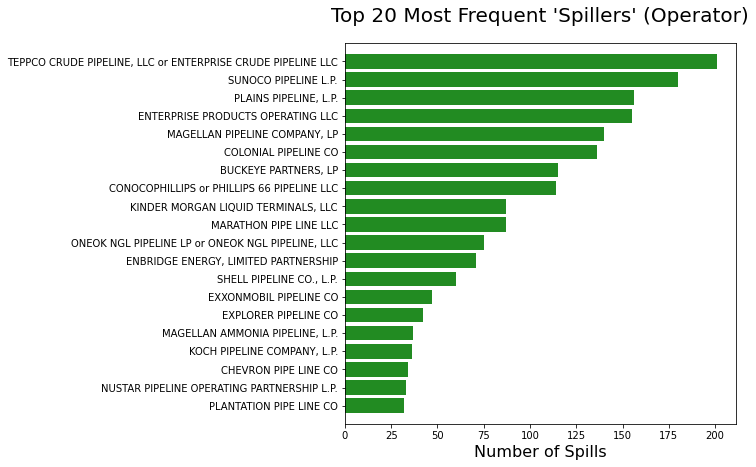

In [30]:
fig = plt.figure(figsize=(7, 7))
plt.barh(hXvalue[::-1], hValues, align='center', color='forestgreen')
plt.ylim([0,len(hValues)+1])
plt.title('Top 20 Most Frequent \'Spillers\' (Operator)', fontsize=20, y=1.04)
y = plt.yticks(hXvalue[::-1], hLabels, fontsize=10)
x = plt.xlabel('Number of Spills', fontsize=16)
x2 = plt.xticks(fontsize=10)

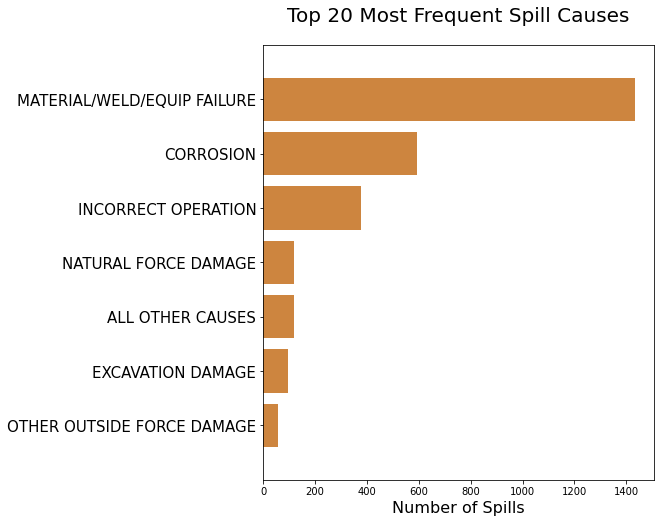

In [31]:
fig = plt.figure(figsize=(7, 8))
plt.barh(hXvalue2[::-1], hValues2, align='center', color='peru')
plt.ylim([0,len(hValues2)+1])
plt.title('Top 20 Most Frequent Spill Causes', fontsize=20, y=1.04)
y = plt.yticks(hXvalue2[::-1], hLabels2, fontsize=15)
x = plt.xlabel('Number of Spills', fontsize=16)
x2 = plt.xticks(fontsize=10)

I think that the conclusions from these statistics is clear. Namely, that the vast majority of the spills are the fault of the operator. I put material/weld/equipment failure, incorrect operation, and excavation damage clerly in the foot of the operator. Corrosion is largely their fault as well, but not as directly (or acutely). Clearly, many of these companies should be putting more time & effort into pipeline maintenance.

# Correlation between cost and spill size, other factors...
My naive guess would be that the bigger the spill size (in barrels) would lead to a most costly clean-up and damages. However, we saw above that the most costly spills in the data aren't in fact the largest. So there are other factors that come in to play.

This section is an exploration of this relationship and is definitely a work in progress.

Text(0.005, 100000000.0, 'Emergency Costs')

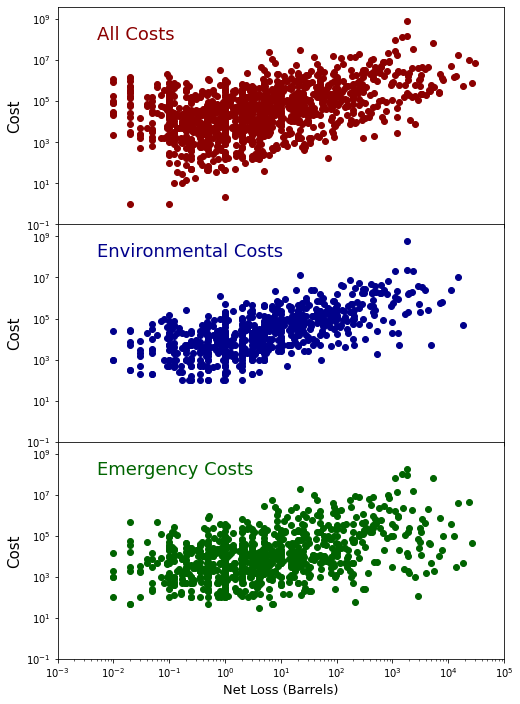

In [32]:
f, a = plt.subplots(nrows=3, ncols=1, figsize=(8,12), sharex=True)
f.subplots_adjust(hspace=0.)

a[0].scatter(df['Net Loss (Barrels)'].values,
              df['All Costs'].values, 
              label="All", color='darkred')
a[0].set_yscale('log')
a[0].set_ylim(0.1,4e9)
a[0].set_xscale('log')
a[0].set_xlim(0.001,100000)
a[0].set_ylabel('Cost', fontsize=15)
a[1].scatter(df['Net Loss (Barrels)'].values,
              df['Environmental Remediation Costs'].values, 
              label="All", color='darkblue')
a[1].set_yscale('log')
a[1].set_ylim(0.1,4e9)
a[1].set_xscale('log')
a[1].set_xlim(0.001,100000)
a[1].set_ylabel('Cost', fontsize=15)
a[2].scatter(df['Net Loss (Barrels)'].values,
              df['Emergency Response Costs'].values, 
              label="All", color='darkgreen')
a[2].set_yscale('log')
a[2].set_ylim(0.1,4e9)
a[2].set_xscale('log')
a[2].set_xlim(0.001,100000)
a[2].set_ylabel('Cost', fontsize=15)
a[2].set_xlabel('Net Loss (Barrels)', fontsize=13)
a[0].text(0.005, 1e8, "All Costs", fontsize=18, color='darkred')
a[1].text(0.005, 1e8, "Environmental Costs", fontsize=18, color='darkblue')
a[2].text(0.005, 1e8, "Emergency Costs", fontsize=18, color='darkgreen')

The cost is certainly positively correlated with the net loss (less so the Emergency Costs). I hesitate to fit these distributions because there is so much spread and because it definitely seems like there are several sub-populations in the data (for example, in the 'All Costs' plot in the top, there are outliers at low cost and at low loss.)